<a href="https://colab.research.google.com/github/crazymuse/Gitbootcamp/blob/master/ImageRetrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#@title Imports and function definitions

# For running inference on the TF-Hub module.
import tensorflow as tf
import tensorflow_hub as hub

# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# For drawing onto the image.
import numpy as np
from PIL import Image

# For measuring the inference time.
import time
import json

# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.test.gpu_device_name())

# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.test.gpu_device_name())

module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1" #@param ["https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1", "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"]

detector = hub.Module(module_handle)

The following GPU devices are available: 
The following GPU devices are available: 


In [5]:
image_string_placeholder = tf.placeholder(tf.string)
decoded_image = tf.image.decode_jpeg(image_string_placeholder)
# Module accepts as input tensors of shape [1, height, width, 3], i.e. batch
# of size 1 and type tf.float32.
decoded_image_float = tf.image.convert_image_dtype(
  image=decoded_image, dtype=tf.float32)
module_input = tf.expand_dims(decoded_image_float, 0)
result = detector(module_input, as_dict=True)
init_ops = [tf.global_variables_initializer(), tf.tables_initializer()]

session = tf.Session()
session.run(init_ops)

FileNotFoundError: ignored

In [22]:
import os
result_out_combined={}

for filename in os.listdir('./'):
    if not filename.endswith('.jpg'): continue
    result_out, image_out = session.run(
      [result, decoded_image],
      feed_dict={image_string_placeholder: open(filename,'rb').read()})
    indexes=[idx for idx,x in enumerate(result_out['detection_class_entities']) if str(x).find('bag')>-1]
    print (indexes)
    out={ k:result_out[k][indexes].tolist() for k in result_out}
    result_out_combined[filename]=out

[0, 4, 13, 14, 49, 71, 72, 77, 80]
[4, 7]
[5, 9, 12, 14, 29, 35, 86, 88, 91, 99]
[0, 7, 28, 31, 35, 51, 56, 69, 75, 86]
[96]
[0, 38, 39, 57, 87]
[1, 23]
[0, 5, 7, 32, 33, 47, 61, 69, 89, 96]
[9, 31, 55, 95]
[2, 30, 65]
[0, 2, 4, 35, 44, 57, 66, 70, 88, 98]
[0, 88]
[1, 4, 18, 19, 70, 77, 97]
[0, 3, 9, 27, 31, 37, 38, 73, 79, 89]
[4, 48, 58, 73]
[]


In [16]:
for k in out:
  print (k)
  print (out[k])
  print ('----------------')

detection_scores
[0.9816228, 0.5935792, 0.076470904, 0.057767835, 0.0045082266, 0.0017499418, 0.0017324372, 0.0015854625, 0.0015378102]
----------------
detection_class_labels
[405, 405, 405, 405, 554, 405, 554, 554, 554]
----------------
detection_class_entities
[b'Handbag', b'Handbag', b'Handbag', b'Handbag', b'Luggage and bags', b'Handbag', b'Luggage and bags', b'Luggage and bags', b'Luggage and bags']
----------------
detection_class_names
[b'/m/080hkjn', b'/m/080hkjn', b'/m/080hkjn', b'/m/080hkjn', b'/m/0hf58v5', b'/m/080hkjn', b'/m/0hf58v5', b'/m/0hf58v5', b'/m/0hf58v5']
----------------
detection_boxes
[array([0.41459462, 0.19824445, 0.99356705, 0.54023206], dtype=float32), array([0.36014962, 0.25482473, 0.99038506, 0.6403551 ], dtype=float32), array([0.26916295, 0.1898162 , 0.9560256 , 0.75139   ], dtype=float32), array([0.5665306, 0.1997798, 1.       , 0.6495387], dtype=float32), array([0.316534  , 0.19448121, 0.95062023, 0.56468755], dtype=float32), array([0.34567994, 0.37426

In [20]:
import numpy as np
np.array([10,11]).tolist()

[10, 11]

In [0]:
os.mkdir('proposals')

img dim 800 800
[158 331 432 794]
[158 331 432 794]
(274, 463)
cropped dim (274, 463)
img dim 800 800
[203 288 512 792]
[203 288 512 792]
(309, 504)
cropped dim (309, 504)
img dim 800 800
[151 215 601 764]
[151 215 601 764]
(450, 549)
cropped dim (450, 549)
img dim 800 800
[159 453 519 800]
[159 453 519 800]
(360, 347)
cropped dim (360, 347)
img dim 800 800
[155 253 451 760]
[155 253 451 760]
(296, 507)
cropped dim (296, 507)
img dim 800 800
[299 276 564 765]
[299 276 564 765]
(265, 489)
cropped dim (265, 489)
img dim 800 800
[219 329 519 754]
[219 329 519 754]
(300, 425)
cropped dim (300, 425)
img dim 800 800
[130 190 566 736]
[130 190 566 736]
(436, 546)
cropped dim (436, 546)
img dim 800 800
[132 408 419 781]
[132 408 419 781]
(287, 373)
cropped dim (287, 373)
img dim 1400 933
[531 449 649 627]
[531 449 649 627]
(118, 178)
cropped dim (118, 178)
img dim 1400 933
[519 448 645 619]
[519 448 645 619]
(126, 171)
cropped dim (126, 171)
img dim 735 1100
[  91  553  400 1010]
[  91  553  4

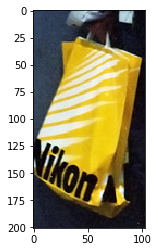

In [122]:
from PIL import Image
import matplotlib.pyplot as plt

img_list=[]
label_list=[]
dfrecordlist=[]
i=0
for filename in os.listdir('./'):
    if not filename.endswith('.jpg'): continue
    originalimg = Image.open(filename)
    for idx,box in enumerate(result_out_combined[filename]['detection_boxes']):
      img=originalimg.copy()
      print ('img dim',img.size[0],img.size[1])
      w,h=img.size
      # top, left, bottom,right
      #ymin, xmin, ymax, xmax
      newbox=np.array((box[1],box[0],box[3],box[2]))*np.array([w,h,w,h]) #left top right bottom
      newbox=newbox.astype('int')
      print (newbox)
      cropped = img.crop(box=newbox)
      print (newbox)
      print(cropped.size)
      plt.imshow(np.array(cropped,dtype='uint8'))
      print ('cropped dim',cropped.size)
      if result_out_combined[filename]['detection_scores'][idx]>0.1:
        record={}
        img_list.append(cropped)
        label_list.append(result_out_combined[filename]['detection_class_entities'][idx])
        record['filename']=filename
        record['left']=newbox[0]
        record['top']=newbox[1]
        record['right']=newbox[2]
        record['bottom']=newbox[3]
        record['width']=newbox[2]-newbox[0]
        record['height']=newbox[3]-newbox[1]
        record['area']=record['width']*record['height']
        record['confidence']=result_out_combined[filename]['detection_scores'][idx]
        record['label_name']=result_out_combined[filename]['detection_class_entities'][idx]
        record['label_id']=result_out_combined[filename]['detection_class_labels'][idx]
        record['id']=i
        i=i+1
        dfrecordlist.append(record)

In [0]:
import pandas as pd
df = pd.DataFrame(dfrecordlist,columns=['id','filename','label_name','label_id','confidence','left','top','right','bottom','area','width','height'])

IndexError: ignored

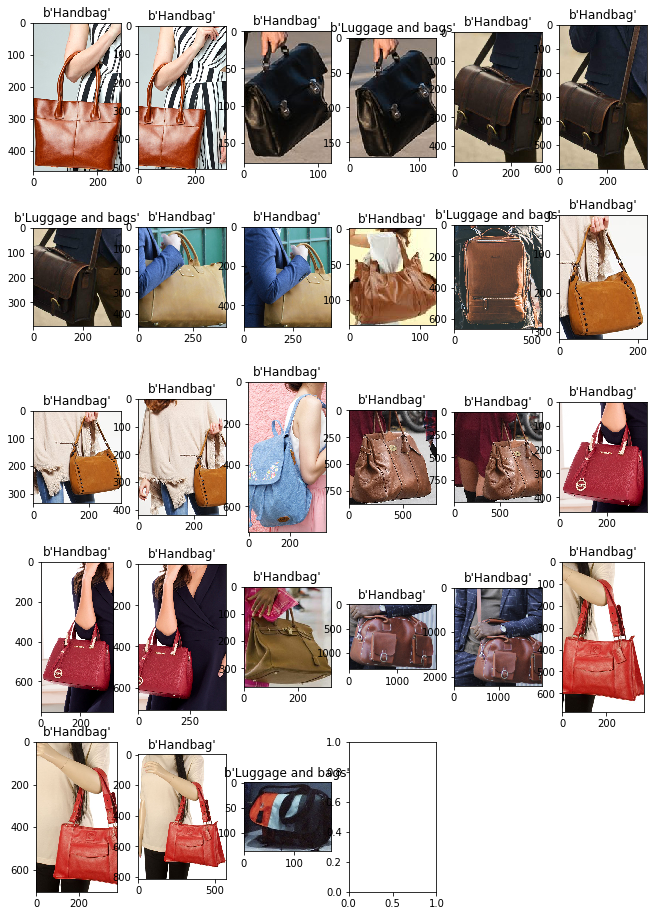

In [118]:
plt.figure(figsize=(11,16))
for i in range(30):
  plt.subplot(5,6,i+1)
  plt.imshow(img_list[i])
  plt.title(str(label_list[i]))

In [126]:
df.head()

,id,filename,label_name,label_id,confidence,left,top,right,bottom,area,width,height
0,0,bag5.jpg,b'Handbag',405,0.981623,158,331,432,794,126862,274,463
1,1,bag5.jpg,b'Handbag',405,0.593579,203,288,512,792,155736,309,504
2,2,bag7.jpg,b'Handbag',405,0.318965,531,449,649,627,21004,118,178
3,3,bag7.jpg,b'Luggage and bags',554,0.172516,519,448,645,619,21546,126,171
4,4,bag9f.jpg,b'Handbag',405,0.353388,91,553,400,1010,141213,309,457


In [0]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [142]:
model=ResNet50(weights='imagenet',include_top = False)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 3s 0us/step


In [137]:
img_list_resized=np.array([np.array(img.resize((224,224))) for img in img_list])
img_list_resized.shape

(27, 224, 224, 3)

In [147]:
batchsize=10
import math
total=len(img_list_resized)
featurelist=[]
for i in range(math.ceil(total/batchsize)):
  st=batchsize*i
  ed=min(total,batchsize*(i+1))
  features = model.predict(img_list_resized[st:ed])
  featurelist.extend(np.mean(features,axis=(0,1)))

featurelist=np.array(featurelist)
print (featurelist.shape)

(21, 2048)


In [0]:
import pickle as pkl
pkl.dump(featurelist,open('featurebank.pkl','wb'),pkl.HIGHEST_PROTOCOL)

In [0]:
df.to_csv(open('featureinfo.csv','w'),index=False)

# Analyzing features

In [0]:
from sklearn.neighbors import NearestNeighbors

In [0]:
nnmodel=NearestNeighbors(n_neighbors=3)

In [157]:
nnmodel.fit(featurelist)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

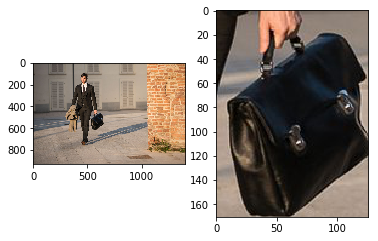

In [181]:
query_idx=3
plt.subplot(1,2,1)
plt.imshow(plt.imread(df.iloc[query_idx,:]['filename']))
plt.subplot(1,2,2)
left,top,right,bottom=df.iloc[query_idx,:]['left'],df.iloc[query_idx,:]['top'],df.iloc[query_idx,:]['right'],df.iloc[query_idx,:]['bottom']
plt.imshow(plt.imread(df.iloc[query_idx,:]['filename'])[top:bottom,left:right,:])


3
2
4


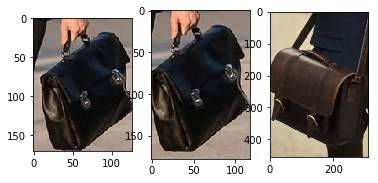

In [182]:
_,ids=nnmodel.kneighbors(featurelist[query_idx:query_idx+1])
for idx,result_idx in enumerate(ids[0]):
  print (result_idx)
  left=df.iloc[result_idx,:]['left']
  top=df.iloc[result_idx,:]['top']
  right=df.iloc[result_idx,:]['right']
  bottom=df.iloc[result_idx,:]['bottom']
  plt.subplot(1,3,idx+1)
  plt.imshow(plt.imread(df.iloc[result_idx,:]['filename'])[top:bottom,left:right,:])
